In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk

In [36]:
nltk.download(['stopwords','punkt','wordnet','omw-1.4','vader_lexicon'])
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\visak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\visak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\visak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\visak\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\visak\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
reviews = pd.read_csv('tourist_accommodation_reviews.csv')
reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [38]:
reviews['Location'].unique()

array([' Kathu', ' Kata Beach', ' Rawai', ' Choeng Thale', ' Karon Beach',
       ' Phuket Town', ' Patong', ' Mai Khao', ' Karon', ' Chalong',
       ' Nai Harn', ' Cape Panwa', ' Sakhu', ' Pa Khlok', ' Kamala',
       ' Bang Tao Beach', ' Thalang District', ' Talat Nuea',
       ' Kata Noi Beach', ' Wichit', ' Nai Yang', ' Talat Yai',
       ' Koh Kaew', ' Nai Thon', ' Ratsada'], dtype=object)

In [39]:
reviews['Review'].count()

53644

In [40]:
getReviewCount = reviews.groupby(['Location']).Review.nunique()
getReviewCount

Location
 Bang Tao Beach        600
 Cape Panwa           1500
 Chalong              1197
 Choeng Thale         3218
 Kamala               2930
 Karon                5295
 Karon Beach           367
 Kata Beach           5433
 Kata Noi Beach        200
 Kathu                1018
 Koh Kaew              293
 Mai Khao             2242
 Nai Harn              801
 Nai Thon               84
 Nai Yang              986
 Pa Khlok              100
 Patong              15111
 Phuket Town          3126
 Ratsada                88
 Rawai                3471
 Sakhu                  61
 Talat Nuea             77
 Talat Yai             300
 Thalang District     1066
 Wichit                375
Name: Review, dtype: int64

In [41]:
getLocationsOrder =  getReviewCount.sort_values(ascending=[False])
getLocationsOrder

Location
 Patong              15111
 Kata Beach           5433
 Karon                5295
 Rawai                3471
 Choeng Thale         3218
 Phuket Town          3126
 Kamala               2930
 Mai Khao             2242
 Cape Panwa           1500
 Chalong              1197
 Thalang District     1066
 Kathu                1018
 Nai Yang              986
 Nai Harn              801
 Bang Tao Beach        600
 Wichit                375
 Karon Beach           367
 Talat Yai             300
 Koh Kaew              293
 Kata Noi Beach        200
 Pa Khlok              100
 Ratsada                88
 Nai Thon               84
 Talat Nuea             77
 Sakhu                  61
Name: Review, dtype: int64

In [42]:
getLocationsOrder.nlargest(30)

Location
 Patong              15111
 Kata Beach           5433
 Karon                5295
 Rawai                3471
 Choeng Thale         3218
 Phuket Town          3126
 Kamala               2930
 Mai Khao             2242
 Cape Panwa           1500
 Chalong              1197
 Thalang District     1066
 Kathu                1018
 Nai Yang              986
 Nai Harn              801
 Bang Tao Beach        600
 Wichit                375
 Karon Beach           367
 Talat Yai             300
 Koh Kaew              293
 Kata Noi Beach        200
 Pa Khlok              100
 Ratsada                88
 Nai Thon               84
 Talat Nuea             77
 Sakhu                  61
Name: Review, dtype: int64

In [43]:
orderHotelByLocation= reviews.groupby(['Location','Hotel/Restaurant name']).Review.nunique()
orderHotelByLocation

Location           Hotel/Restaurant name            
 Bang Tao Beach    Catch Beach Club                     100
                   Pooh and Friends                     100
                   Riverside Restaurant                 100
                   Sugar Cane Restaurant                100
                   The Bistro                           100
                                                       ... 
 Thalang District  Tony Seafood Restaurant              100
 Wichit            Blue Wave Restaurant                  88
                   Bollywood Phuket Restaurant & Bar    100
                   Ship Inn Bar & Restaurant             87
                   Sunset Bar                           100
Name: Review, Length: 542, dtype: int64

In [44]:
values = reviews.groupby(['Hotel/Restaurant name']).Review.nunique()
values

Hotel/Restaurant name
+39 Italian Street Food              31
2gether Restaurant                  100
3 Spices Restaurant                 100
360 ° Bar                           100
44 Thaikitchen "KATA FOOD COURT"     83
                                   ... 
Ying Restaurant                     100
Yo Green Restaurant                 100
Yorkshire Hotel Restaurant          100
You and Me Patong                   100
i-Kroon Cafe                        100
Name: Review, Length: 537, dtype: int64

In [45]:
getHotelsOrder =  values.sort_values(ascending=[False])
getHotelsOrder

Hotel/Restaurant name
No.6 Restaurant                200
Sabai Sabai                    200
The Family Restaurant          196
The Pizza Company              188
Outdoor Restaurant             173
                              ... 
Baoli                           19
Baia Del Sole                   12
Chez Nicolas                     9
Dada Yura Restaurant             8
Chekhoff Restaurant and Bar      3
Name: Review, Length: 537, dtype: int64

In [46]:
finalOrderList = getHotelsOrder.nlargest(30)
finalOrderList

Hotel/Restaurant name
No.6 Restaurant                      200
Sabai Sabai                          200
The Family Restaurant                196
The Pizza Company                    188
Outdoor Restaurant                   173
Da Mario                             159
Napoli Ristorante Pizzeria           100
No 9 Restaurant                      100
No 9 2nd Restaurant                  100
Nikitas Beach Restaurant             100
Nicky's Handlebar                    100
New York Burger Co.                  100
Naughty Nuri's Phuket                100
Natural Restaurant                   100
Natural Efe Macrobiotic World        100
Natalie's Restaurant                 100
i-Kroon Cafe                         100
No. 24 Bar & Restaurant              100
Nami                                 100
The Drunken Leprechaun               100
Mr.Coffee                            100
Mr Good's Seafood                    100
Mom Tri's Kitchen at Villa Royale    100
Molly's Tavern                     

In [47]:
finalOrderListSelected = reviews.groupby(['Hotel/Restaurant name']).Review.nunique().nlargest(35)
finalOrderListSelected

Hotel/Restaurant name
No.6 Restaurant                       200
Sabai Sabai                           200
The Family Restaurant                 196
The Pizza Company                     188
Outdoor Restaurant                    173
Da Mario                              159
2gether Restaurant                    100
3 Spices Restaurant                   100
360 ° Bar                             100
9' Sea Breeze                         100
99 Seafood                            100
A Spoonful of Sugar                   100
Acqua Restaurant                      100
After Beach Bar                       100
Ali Baba Restaurant                   100
Amalfi                                100
Anchor Inn                            100
Andaman Grill                         100
Angus O'Tool's Irish Pub              100
Ann Restaurant                        100
Ann's Kitchen Bar and Grill           100
Ao Chalong Yacht Club Restaurant      100
Arabia Restaurant                     100
Atsumi Raw C

In [48]:
finalOrderListSelected1 = finalOrderListSelected[0:1]
finalOrderListSelected1

Hotel/Restaurant name
No.6 Restaurant    200
Name: Review, dtype: int64

In [49]:
finalOrderListSelected2 = finalOrderListSelected[6:35]
finalOrderListSelected2

Hotel/Restaurant name
2gether Restaurant                    100
3 Spices Restaurant                   100
360 ° Bar                             100
9' Sea Breeze                         100
99 Seafood                            100
A Spoonful of Sugar                   100
Acqua Restaurant                      100
After Beach Bar                       100
Ali Baba Restaurant                   100
Amalfi                                100
Anchor Inn                            100
Andaman Grill                         100
Angus O'Tool's Irish Pub              100
Ann Restaurant                        100
Ann's Kitchen Bar and Grill           100
Ao Chalong Yacht Club Restaurant      100
Arabia Restaurant                     100
Atsumi Raw Cafe                       100
Audy Restaurant                       100
Aussie Pub Kamala                     100
Autogrill Risto Bar Pizza             100
B-Hive Gallery, Bar and Restaurant    100
BYD Lofts Restaurant Bistro & Bar     100
Baan Chom Vi

In [50]:
concatenatedList = pd.concat([finalOrderListSelected1, finalOrderListSelected2])
concatenatedList 

Hotel/Restaurant name
No.6 Restaurant                       200
2gether Restaurant                    100
3 Spices Restaurant                   100
360 ° Bar                             100
9' Sea Breeze                         100
99 Seafood                            100
A Spoonful of Sugar                   100
Acqua Restaurant                      100
After Beach Bar                       100
Ali Baba Restaurant                   100
Amalfi                                100
Anchor Inn                            100
Andaman Grill                         100
Angus O'Tool's Irish Pub              100
Ann Restaurant                        100
Ann's Kitchen Bar and Grill           100
Ao Chalong Yacht Club Restaurant      100
Arabia Restaurant                     100
Atsumi Raw Cafe                       100
Audy Restaurant                       100
Aussie Pub Kamala                     100
Autogrill Risto Bar Pizza             100
B-Hive Gallery, Bar and Restaurant    100
BYD Lofts Re

In [52]:
selected_hotels = list(concatenatedList.index)
selected_hotels

['No.6 Restaurant',
 '2gether Restaurant',
 '3 Spices Restaurant',
 '360 ° Bar',
 "9' Sea Breeze",
 '99 Seafood',
 'A Spoonful of Sugar',
 'Acqua Restaurant',
 'After Beach Bar',
 'Ali Baba Restaurant',
 'Amalfi',
 'Anchor Inn',
 'Andaman Grill',
 "Angus O'Tool's Irish Pub",
 'Ann Restaurant',
 "Ann's Kitchen Bar and Grill",
 'Ao Chalong Yacht Club Restaurant',
 'Arabia Restaurant',
 'Atsumi Raw Cafe',
 'Audy Restaurant',
 'Aussie Pub Kamala',
 'Autogrill Risto Bar Pizza',
 'B-Hive Gallery, Bar and Restaurant',
 'BYD Lofts Restaurant Bistro & Bar',
 'Baan Chom View',
 'Baan Kalim',
 'Baan Mai',
 'Baan Noy Restaurant',
 'Baan Ra Tree Restaurant',
 'Baan Rim Pa Kalim']

In [53]:
check = reviews[reviews['Hotel/Restaurant name'] == 'Ao Chalong Yacht Club Restaurant']
check

,ID,Review Date,Location,Hotel/Restaurant name,Review
2090,rn580723559,Reviewed 4 days ago,Patong,Ao Chalong Yacht Club Restaurant,I've gone to the Yacht club with my family (wi...
2091,rn577320858,Reviewed 2 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,I’ve been here about six or seven times over t...
2092,rn576656608,Reviewed 3 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,Our host has lost his desire it seems to make ...
2093,rn574668469,Reviewed 4 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,"Pork Finle, OMG is the best !!!\r\nCool , Cozy..."
2094,rn573610343,Reviewed 5 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,Sunday Roast recommended by a friend and well ...
...,...,...,...,...,...
2185,rn346584098,"Reviewed February 10, 2016",Patong,Ao Chalong Yacht Club Restaurant,"The Owner,really goes that extra mile,great we..."
2186,rn346009801,"Reviewed February 8, 2016",Patong,Ao Chalong Yacht Club Restaurant,A great bar / restaurant on the water. Good fo...
2187,rn345546611,"Reviewed February 7, 2016",Patong,Ao Chalong Yacht Club Restaurant,5 star food and quality wine and breathtaking ...
2188,rn342960685,"Reviewed January 26, 2016",Patong,Ao Chalong Yacht Club Restaurant,Great location on the shore at Chalong bay wit...


In [54]:
print(selected_hotels)

['No.6 Restaurant', '2gether Restaurant', '3 Spices Restaurant', '360 ° Bar', "9' Sea Breeze", '99 Seafood', 'A Spoonful of Sugar', 'Acqua Restaurant', 'After Beach Bar', 'Ali Baba Restaurant', 'Amalfi', 'Anchor Inn', 'Andaman Grill', "Angus O'Tool's Irish Pub", 'Ann Restaurant', "Ann's Kitchen Bar and Grill", 'Ao Chalong Yacht Club Restaurant', 'Arabia Restaurant', 'Atsumi Raw Cafe', 'Audy Restaurant', 'Aussie Pub Kamala', 'Autogrill Risto Bar Pizza', 'B-Hive Gallery, Bar and Restaurant', 'BYD Lofts Restaurant Bistro & Bar', 'Baan Chom View', 'Baan Kalim', 'Baan Mai', 'Baan Noy Restaurant', 'Baan Ra Tree Restaurant', 'Baan Rim Pa Kalim']


In [55]:
updatedHotelList = reviews[reviews['Hotel/Restaurant name'].isin(selected_hotels)]
updatedHotelList

,ID,Review Date,Location,Hotel/Restaurant name,Review
1990,rn581235855,Reviewed yesterday,Chalong,Baan Noy Restaurant,I try this restaurant yesterday during lunch t...
1991,rn570437353,"Reviewed April 2, 2018",Chalong,Baan Noy Restaurant,"Fred and the team offer very good Thai food, f..."
1992,rn569421541,"Reviewed March 29, 2018",Chalong,Baan Noy Restaurant,Food is purely amazing and the best as is the ...
1993,rn566648680,"Reviewed March 15, 2018",Chalong,Baan Noy Restaurant,This place is a must visit while being in Chal...
1994,rn565190672,"Reviewed March 7, 2018",Chalong,Baan Noy Restaurant,Entering Baan Noy restaurant is a feeling of w...
...,...,...,...,...,...
53542,rn135620088,"Reviewed July 28, 2012",Patong,Ali Baba Restaurant,Words cannot begin in to describe how bad this...
53543,rn133411027,"Reviewed July 3, 2012",Patong,Ali Baba Restaurant,Had Ali Baba last nite. The chicken tikka was ...
53544,rn132876348,"Reviewed June 27, 2012",Patong,Ali Baba Restaurant,"what should have been a great meal, according ..."
53545,rn132871643,"Reviewed June 27, 2012",Patong,Ali Baba Restaurant,Rude owner who obviously wanted to take your m...


In [56]:
updatedHotelList['Hotel/Restaurant name'].unique()

array(['Baan Noy Restaurant', 'Ao Chalong Yacht Club Restaurant',
       "Ann's Kitchen Bar and Grill", 'BYD Lofts Restaurant Bistro & Bar',
       'Autogrill Risto Bar Pizza', 'A Spoonful of Sugar',
       'Acqua Restaurant', 'Arabia Restaurant', '360 ° Bar', 'Baan Mai',
       'Baan Rim Pa Kalim', 'No.6 Restaurant', '2gether Restaurant',
       'Audy Restaurant', 'Baan Ra Tree Restaurant', 'Atsumi Raw Cafe',
       'Aussie Pub Kamala', '3 Spices Restaurant',
       "Angus O'Tool's Irish Pub", 'Andaman Grill', 'Ann Restaurant',
       'Baan Chom View', 'Amalfi', 'Anchor Inn', 'Baan Kalim',
       "9' Sea Breeze", 'After Beach Bar',
       'B-Hive Gallery, Bar and Restaurant', '99 Seafood',
       'Ali Baba Restaurant'], dtype=object)

In [57]:
len(updatedHotelList)

3100

In [58]:
updatedHotelList.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,3100,3100,3100,3100,3100
unique,3100,1267,12,30,3100
top,rn581235855,Reviewed 2 weeks ago,Patong,No.6 Restaurant,I try this restaurant yesterday during lunch t...
freq,1,18,900,200,1


# Pre Processing

In [59]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [60]:
def preprocess_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
    return stemmed_text

# Sentiment Analysis

In [61]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [62]:
updatedHotelList['compound'] = [sentiment.polarity_scores(review)['compound'] for review in updatedHotelList['Review']]
updatedHotelList['neg'] = [sentiment.polarity_scores(review)['neg'] for review in updatedHotelList['Review']]
updatedHotelList['neu'] = [sentiment.polarity_scores(review)['neu'] for review in updatedHotelList['Review']]
updatedHotelList['pos'] = [sentiment.polarity_scores(review)['pos'] for review in updatedHotelList['Review']]

C:\Users\visak\AppData\Local\Temp\ipykernel_16716\904649599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updatedHotelList['compound'] = [sentiment.polarity_scores(review)['compound'] for review in updatedHotelList['Review']]
C:\Users\visak\AppData\Local\Temp\ipykernel_16716\904649599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updatedHotelList['neg'] = [sentiment.polarity_scores(review)['neg'] for review in updatedHotelList['Review']]
C:\Users\visak\AppData\Local\Temp\ipykernel_16716\90464959

In [63]:
updatedHotelList.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
1990,rn581235855,Reviewed yesterday,Chalong,Baan Noy Restaurant,I try this restaurant yesterday during lunch t...,0.7506,0.073,0.709,0.219
1991,rn570437353,"Reviewed April 2, 2018",Chalong,Baan Noy Restaurant,"Fred and the team offer very good Thai food, f...",0.9298,0.000,0.619,0.381
1992,rn569421541,"Reviewed March 29, 2018",Chalong,Baan Noy Restaurant,Food is purely amazing and the best as is the ...,0.9230,0.000,0.653,0.347
1993,rn566648680,"Reviewed March 15, 2018",Chalong,Baan Noy Restaurant,This place is a must visit while being in Chal...,0.6580,0.000,0.889,0.111
1994,rn565190672,"Reviewed March 7, 2018",Chalong,Baan Noy Restaurant,Entering Baan Noy restaurant is a feeling of w...,0.9165,0.069,0.618,0.314


In [64]:
updatedHotelList[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,3100.000000,3100.000000,3100.000000,3100.000000
mean,0.671473,0.026709,0.735290,0.237996
std,0.418011,0.050988,0.122113,0.131460
min,-0.965400,0.000000,0.298000,0.000000
25%,0.612400,0.000000,0.659000,0.138000
50%,0.854500,0.000000,0.738000,0.233500
75%,0.930000,0.042000,0.822000,0.327000
max,0.990400,0.443000,1.000000,0.676000


<AxesSubplot:xlabel='compound', ylabel='Count'>

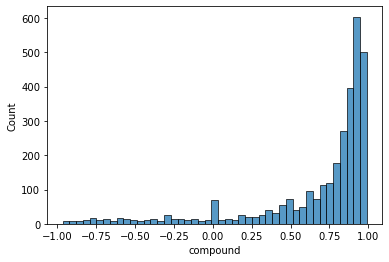

In [65]:
sns.histplot(updatedHotelList['compound'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

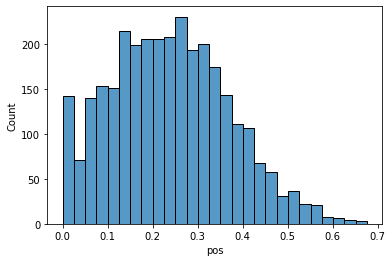

In [66]:
sns.histplot(updatedHotelList['pos'])

<AxesSubplot:xlabel='neu', ylabel='Count'>

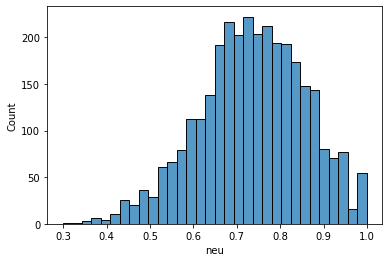

In [67]:
sns.histplot(updatedHotelList['neu'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

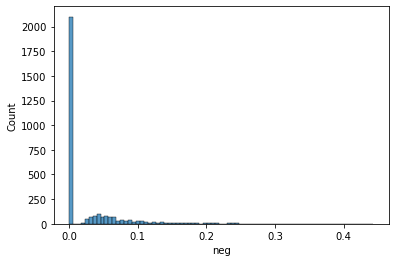

In [68]:
sns.histplot(updatedHotelList['neg'])

In [69]:
(updatedHotelList['compound']<=0).groupby(updatedHotelList['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
2gether Restaurant                    12
3 Spices Restaurant                    6
360 ° Bar                              5
9' Sea Breeze                         11
99 Seafood                            23
A Spoonful of Sugar                    4
Acqua Restaurant                       6
After Beach Bar                       18
Ali Baba Restaurant                   37
Amalfi                                 9
Anchor Inn                            20
Andaman Grill                         11
Angus O'Tool's Irish Pub               9
Ann Restaurant                        17
Ann's Kitchen Bar and Grill            5
Ao Chalong Yacht Club Restaurant       2
Arabia Restaurant                      7
Atsumi Raw Cafe                        6
Audy Restaurant                        5
Aussie Pub Kamala                      9
Autogrill Risto Bar Pizza             10
B-Hive Gallery, Bar and Restaurant     7
BYD Lofts Restaurant Bistro & Bar      6
Baan Chom View                     

In [70]:
percent_negative = pd.DataFrame((updatedHotelList['compound']<=0).groupby(updatedHotelList['Hotel/Restaurant name']).sum()
                               /updatedHotelList['Hotel/Restaurant name'].groupby(updatedHotelList['Hotel/Restaurant name']).count()*100,
                               columns=['% negative reviews']).sort_values(by='% negative reviews')

In [71]:
percent_negative

,% negative reviews
Hotel/Restaurant name,
Ao Chalong Yacht Club Restaurant,2.0
Baan Noy Restaurant,4.0
A Spoonful of Sugar,4.0
Baan Rim Pa Kalim,4.0
Ann's Kitchen Bar and Grill,5.0
360 ° Bar,5.0
Audy Restaurant,5.0
3 Spices Restaurant,6.0
Acqua Restaurant,6.0


<AxesSubplot:xlabel='% negative reviews', ylabel='Hotel/Restaurant name'>

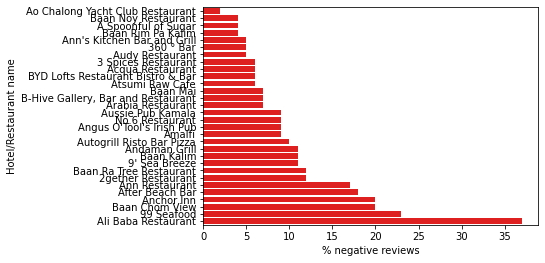

In [72]:
sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='r')

In [77]:
print('Enter Hotel name from the list:\n',selected_hotels)
name = input("Enter Hotel Name: ")
print(name)

Enter Hotel name from the list:
 ['No.6 Restaurant', '2gether Restaurant', '3 Spices Restaurant', '360 ° Bar', "9' Sea Breeze", '99 Seafood', 'A Spoonful of Sugar', 'Acqua Restaurant', 'After Beach Bar', 'Ali Baba Restaurant', 'Amalfi', 'Anchor Inn', 'Andaman Grill', "Angus O'Tool's Irish Pub", 'Ann Restaurant', "Ann's Kitchen Bar and Grill", 'Ao Chalong Yacht Club Restaurant', 'Arabia Restaurant', 'Atsumi Raw Cafe', 'Audy Restaurant', 'Aussie Pub Kamala', 'Autogrill Risto Bar Pizza', 'B-Hive Gallery, Bar and Restaurant', 'BYD Lofts Restaurant Bistro & Bar', 'Baan Chom View', 'Baan Kalim', 'Baan Mai', 'Baan Noy Restaurant', 'Baan Ra Tree Restaurant', 'Baan Rim Pa Kalim']
Enter Hotel Name: 3 Spices Restaurant
3 Spices Restaurant


In [78]:
updatedHotelList['processed_review'] = updatedHotelList['Review'].apply(preprocess_text)
reviews_positive_subset = updatedHotelList.loc[(updatedHotelList['Hotel/Restaurant name'] == name) & (updatedHotelList['compound']>0),:]
reviews_negative_subset = updatedHotelList.loc[(updatedHotelList['Hotel/Restaurant name'] == name) & (updatedHotelList['compound']<=0),:]
reviews_negative_subset.head()

C:\Users\visak\AppData\Local\Temp\ipykernel_16716\18103472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updatedHotelList['processed_review'] = updatedHotelList['Review'].apply(preprocess_text)


,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
34882,rn581181959,Reviewed yesterday,Patong,3 Spices Restaurant,The food was average my other half ask for som...,0.0000,0.000,1.000,0.000,"[food, averag, half, ask, someth, mild, brough..."
34895,rn550763098,"Reviewed January 1, 2018",Patong,3 Spices Restaurant,Really had high expectations when we arrived. ...,-0.8604,0.207,0.746,0.048,"[realli, high, expect, arriv, restaur, look, m..."
34907,rn508098800,"Reviewed August 2, 2017",Patong,3 Spices Restaurant,Absolutely unacceptable. We waited for exactly...,-0.5418,0.117,0.860,0.023,"[absolut, unaccept, wait, exactli, one, hour, ..."
34918,rn467252859,"Reviewed March 14, 2017",Patong,3 Spices Restaurant,I'm sorry but i never ate THAT bad in Thailand...,-0.5306,0.157,0.761,0.082,"[i'm, sorri, never, ate, bad, thailand, order,..."
34928,rn448837177,"Reviewed January 3, 2017",Patong,3 Spices Restaurant,Have been to this restaurant a few times now a...,-0.8266,0.208,0.752,0.040,"[restaur, time, last, experi, great, arriv, gr..."


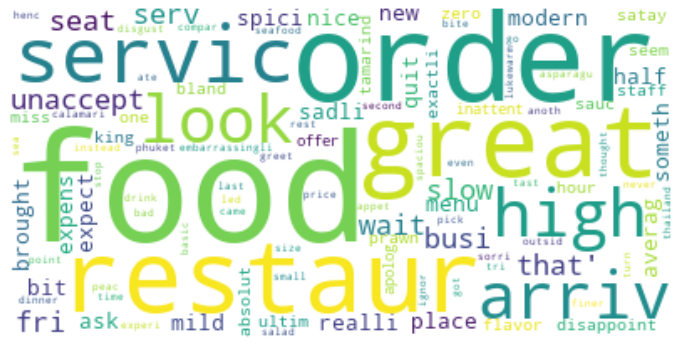

In [79]:
neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]

wordcloud= WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

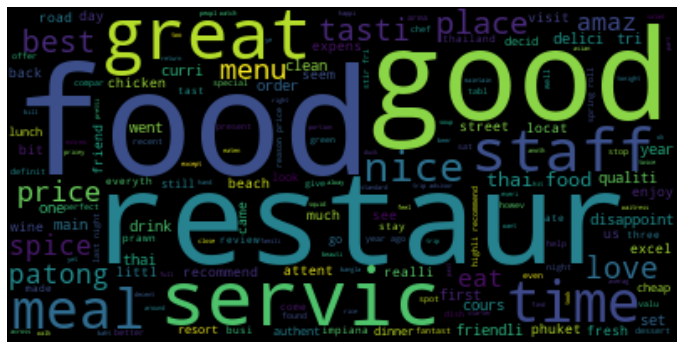

In [80]:
pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]

wordcloud= WordCloud(background_color='black').generate_from_text(' '.join(pos_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# TEXT MINING

In [ ]:
updatedHotelList

In [ ]:
updatedHotelList['Target_Label'] = ['Positive' if x >=0 else 'Negative' for x in updatedHotelList['compound']]

In [ ]:
updatedHotelList.head()

In [ ]:
print(updatedHotelList.groupby('Target_Label').count())

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()
x= vectorizer.fit_transform(updatedHotelList['processed_review'].map(''.join))
x=pd.DataFrame(x.toarray(),columns=vectorizer.get_feature_names_out())
x.head()

In [ ]:
from sklearn.model_selection import train_test_split
y=updatedHotelList['Target_Label']
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=77)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
resampler = RandomUnderSampler(random_state=88)
x_train_undersampled,y_train_undersampled = resampler.fit_resample(x_train,y_train)
sns.countplot(x=y_train_undersampled)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_undersampled, y_train_undersampled)
MultinomialNB()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_pred)
print('Accuracy: %.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('-----------')
result = metrics.classification_report(y_test,y_pred)
print('Classification Report:')
print(result)